In [1]:
import sys
sys.path.insert(0, "../../python")

import os
from ionization import ionization
from ionization import adk
from propagation import propagation
from propagation import plasma
from propagation import laser
from lens import profile
from lens import bessel
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import integrate
from numpy.fft import fft, ifft, fft2, ifft2, fftfreq, fftshift
from scipy.special import jn
from ht import intht
path = '/media/robert/Data_Storage/Data/Ionization/MultiOrderBessel/TwoOrder300um/'

In [2]:
# First we need to refract the first pulse
# Load the inital electric field from the file
modeName = 'Bessel_0/'
EsourcePath = path + modeName

params = np.load(EsourcePath+'params.npy').item()

# Initial electric field
def Efunc(x, y):
    E0 = np.load(params['Esource']+'inputField.npy')
    return E0

# Temporal pulse
def Tfunc(t):
    from ionization import ionization
    tau = 50
    E = ionization.gaussian_envelope(1.0, t, tau).real
    E = E/np.amax(E)
    return E

# Setup the parameters
params['Nt'] = 2**6
params['T'] = 100
params['n0'] = 0.1 #Density in 10^17 cm^-3
params['alpha'] = 0.787
params['EI'] = 15.426
params['Esource'] = EsourcePath
params['nFinal'] = True

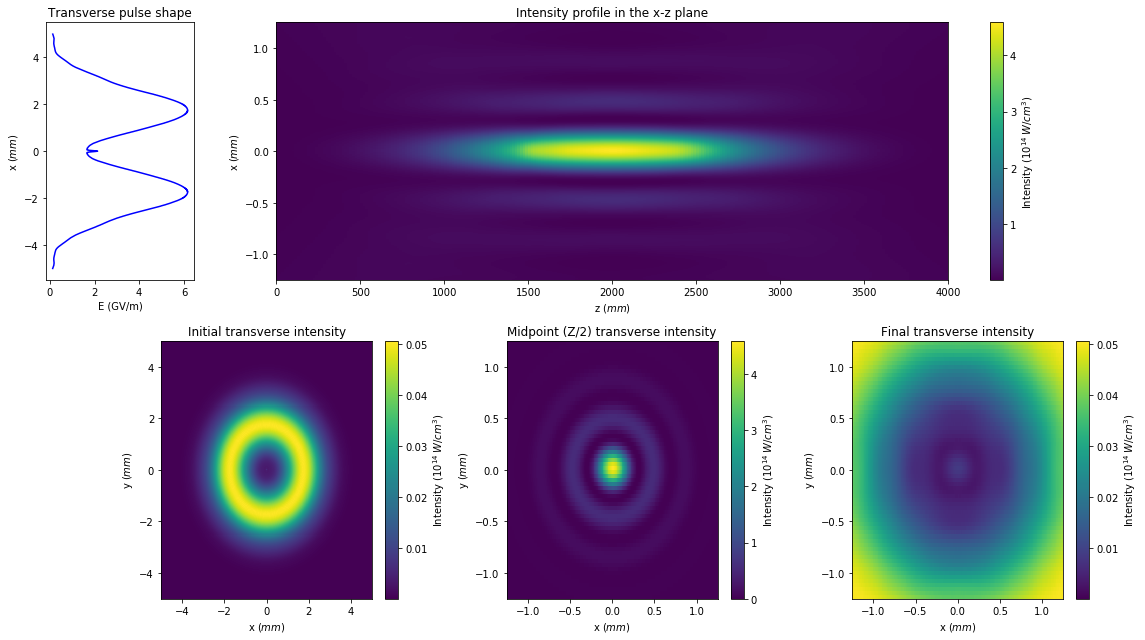

In [3]:
# Sanity check, we've already run this before so we'll overwrite it
directory = 'Density-' + str(params['n0']) +'/' 
if not os.path.exists(path+directory):
    os.makedirs(path+directory)
params['path'] = path + directory + modeName
# Create the directory if it doesn't exist
if not os.path.exists(params['path']):
    os.makedirs(params['path'])
# Simulate free space propagation
propagation.laser_prop(params, Efunc)
propagation.laser_prop_plot(params['path'])

Completed time slice  1  of  64
Completed time slice  2  of  64
Completed time slice  3  of  64
Completed time slice  4  of  64
Completed time slice  5  of  64
Completed time slice  6  of  64
Completed time slice  7  of  64
Completed time slice  8  of  64
Completed time slice  9  of  64
Completed time slice  10  of  64
Completed time slice  11  of  64
Completed time slice  12  of  64
Completed time slice  13  of  64
Completed time slice  14  of  64
Completed time slice  15  of  64
Completed time slice  16  of  64
Completed time slice  17  of  64
Completed time slice  18  of  64
Completed time slice  19  of  64
Completed time slice  20  of  64
Completed time slice  21  of  64
Completed time slice  22  of  64
Completed time slice  23  of  64
Completed time slice  24  of  64
Completed time slice  25  of  64
Completed time slice  26  of  64
Completed time slice  27  of  64
Completed time slice  28  of  64
Completed time slice  29  of  64
Completed time slice  30  of  64
Completed time slic

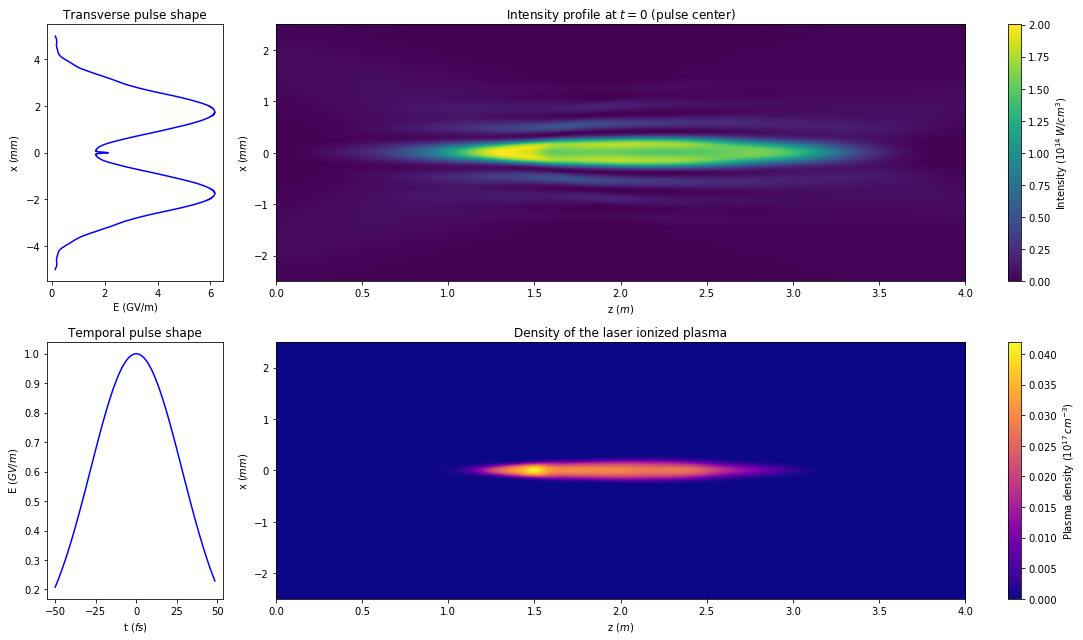

In [4]:
# Run the simulation      
plasma.plasma_refraction(params, Efunc, Tfunc)
# Create the summary
plasma.summary_plot(params['path'])

In [10]:
# First load the plasma density from the first simulation
n = np.load(path+'Density-0.1/Bessel_0/'+'finalDensity.npy')
# Then setup the parameters for the second simulation
modeName = 'Bessel_1/'
EsourcePath = path + modeName

params = np.load(EsourcePath+'params.npy').item()
# Setup the parameters
params['Nt'] = 2**6
params['T'] = 100
params['n0'] = 0.1 #Density in 10^17 cm^-3
params['alpha'] = 0.787
params['EI'] = 15.426
params['Esource'] = EsourcePath
params['nFinal'] = True
params['E0'] = 1.8

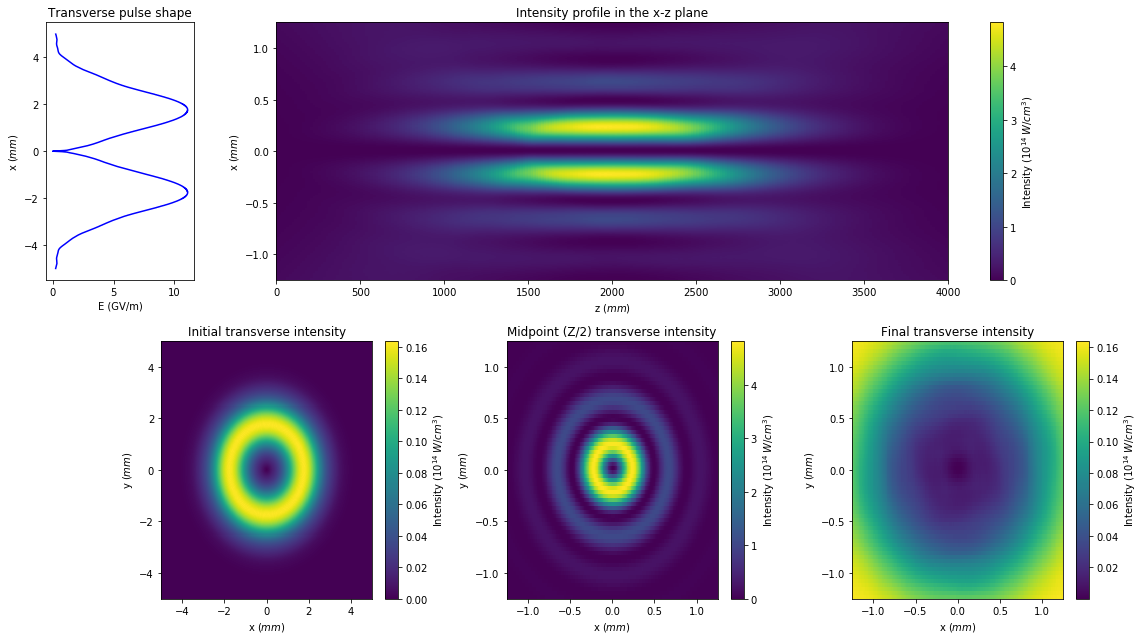

In [11]:
# Sanity check, we've already run this before so we'll overwrite it
directory = 'Density-' + str(params['n0']) +'/' 
if not os.path.exists(path+directory):
    os.makedirs(path+directory)
params['path'] = path + directory + modeName
# Create the directory if it doesn't exist
if not os.path.exists(params['path']):
    os.makedirs(params['path'])
# Simulate free space propagation
propagation.laser_prop(params, Efunc)
propagation.laser_prop_plot(params['path'])

Completed time slice  1  of  64
Completed time slice  2  of  64
Completed time slice  3  of  64
Completed time slice  4  of  64
Completed time slice  5  of  64
Completed time slice  6  of  64
Completed time slice  7  of  64
Completed time slice  8  of  64
Completed time slice  9  of  64
Completed time slice  10  of  64
Completed time slice  11  of  64
Completed time slice  12  of  64
Completed time slice  13  of  64
Completed time slice  14  of  64
Completed time slice  15  of  64
Completed time slice  16  of  64
Completed time slice  17  of  64
Completed time slice  18  of  64
Completed time slice  19  of  64
Completed time slice  20  of  64
Completed time slice  21  of  64
Completed time slice  22  of  64
Completed time slice  23  of  64
Completed time slice  24  of  64
Completed time slice  25  of  64
Completed time slice  26  of  64
Completed time slice  27  of  64
Completed time slice  28  of  64
Completed time slice  29  of  64
Completed time slice  30  of  64
Completed time slic

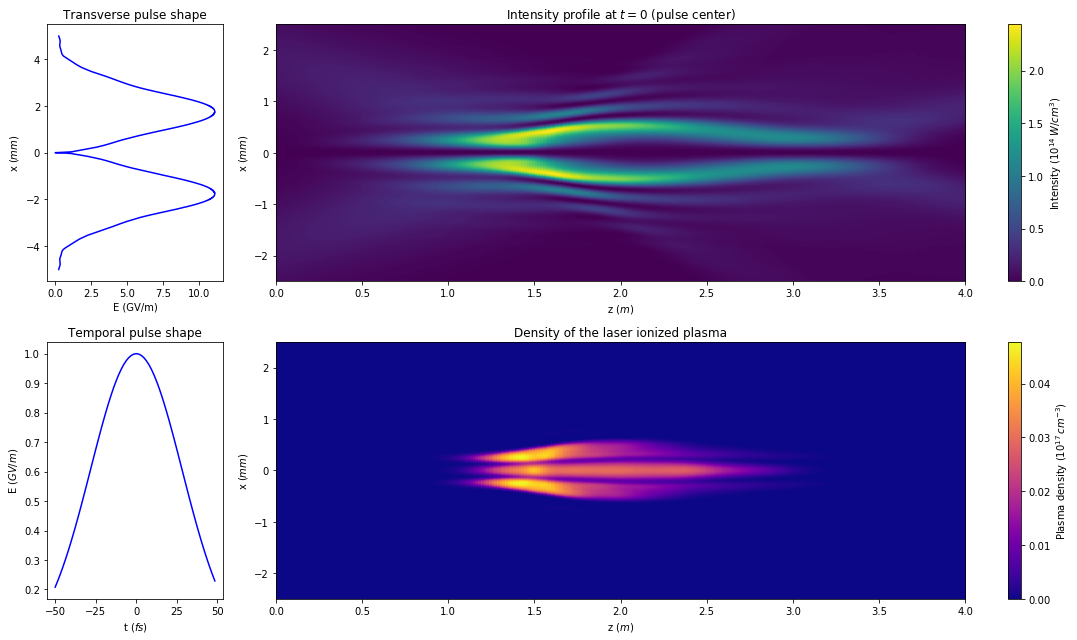

In [12]:
# Run the simulation      
plasma.plasma_refraction(params, Efunc, Tfunc, n=n)
# Create the summary
plasma.summary_plot(params['path'])